<a href="https://www.kaggle.com/code/itsnahm/insurance-claim-price-prediction?scriptVersionId=116754799" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv


# Opening
**Hi everyone!**
I'm beginner in Data Science and I want to learn and practice how to predict insurance claim price. This notebook is insipred by home price prediction with machine learning that I've learned from various resources. 

In this notebook. I'm just practice tutorial from [this](http://https://www.geeksforgeeks.org/house-price-prediction-using-machine-learning-in-python/). It is combined by this tutorial and knowledge that I've understand.

# Import Libraries and Dataset

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv")

In [4]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
df.shape

(1340, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


# Data Preprocessing

In [7]:
numeric_columns = df.select_dtypes(exclude = ["object"])
numeric_columns

,index,PatientID,age,bmi,bloodpressure,children,claim
0,0,1,39.0,23.2,91,0,1121.87
1,1,2,24.0,30.1,87,0,1131.51
2,2,3,NaN,33.3,82,0,1135.94
3,3,4,NaN,33.7,80,0,1136.40
4,4,5,NaN,34.1,100,0,1137.01
...,...,...,...,...,...,...,...
1335,1335,1336,44.0,35.5,88,0,55135.40
1336,1336,1337,59.0,38.1,120,1,58571.07
1337,1337,1338,30.0,34.5,91,3,60021.40
1338,1338,1339,37.0,30.4,106,0,62592.87


In [8]:
categoric_columns = df.select_dtypes(include = ["object"])
categoric_columns

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest
...,...,...,...,...
1335,female,Yes,Yes,northwest
1336,female,No,Yes,northeast
1337,male,Yes,Yes,northwest
1338,male,No,Yes,southeast


In [9]:
obj = (df.dtypes == 'object')
object_variable = list(obj[obj].index)
print("Categorical variables:",len(object_variable))
 
int_ = (df.dtypes == 'int')
integer_variable = list(int_[int_].index)
print("Integer variables:",len(integer_variable))
 
fl = (df.dtypes == 'float')
float_variable = list(fl[fl].index)
print("Float variables:",len(float_variable))

Categorical variables: 4
Integer variables: 4
Float variables: 3


In [10]:
integer_variable

['index', 'PatientID', 'bloodpressure', 'children']

# Data Cleaning

In [11]:
df.nunique()

index            1340
PatientID        1340
age                43
gender              2
bmi               275
bloodpressure      61
diabetic            2
children            6
smoker              2
region              4
claim            1337
dtype: int64

Delete columns where have unique values as much as row in data.

In [12]:
df = df.drop(["index","PatientID"], axis=1)

In [13]:
df.isna().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

Since missing values are only few in overall data, just drop the row where has missing values.

In [14]:
df = df.dropna()

In [15]:
df.isna().sum().sum()

0

In [16]:
df.duplicated().sum()

0

There is no duplicate data in dataset insurance.

# Exploratory Data Analysis (EDA)

<AxesSubplot:>

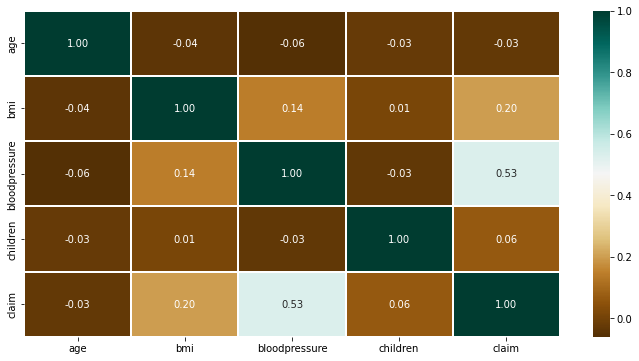

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


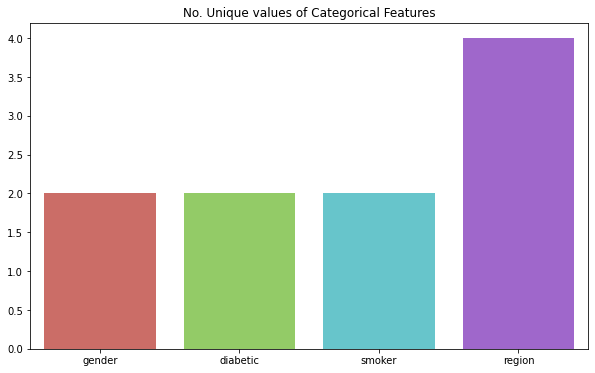

In [18]:
unique_values = []
for i in object_variable:
    unique_values.append(df[i].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
#plt.xticks(rotation=40)
sns.barplot(x=object_variable,y=unique_values,palette="hls")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

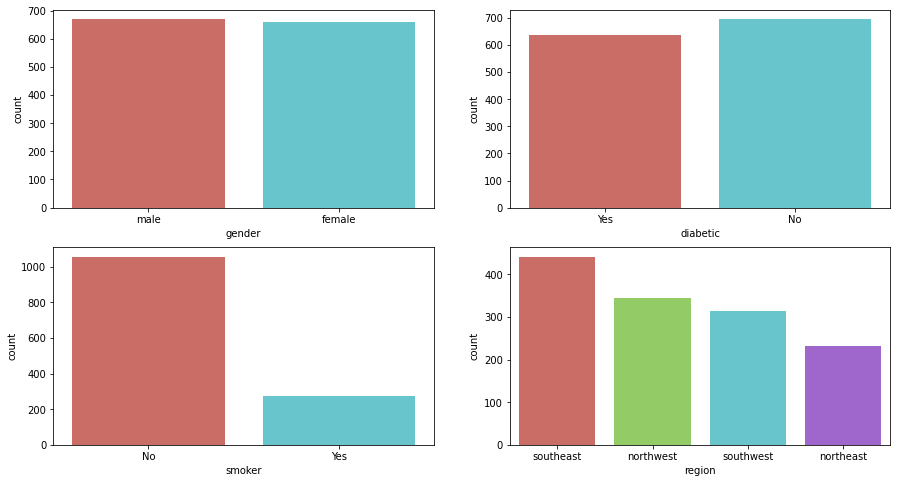

In [19]:
plt.figure(figsize = (15, 8))
number = 1
row = 2
for i in categoric_columns:
    plt.subplot(row, 2, number)
    sns.countplot(df[i], palette="hls")
    number += 1

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'bloodpressure'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'claim'}>, <AxesSubplot:>]],
      dtype=object)

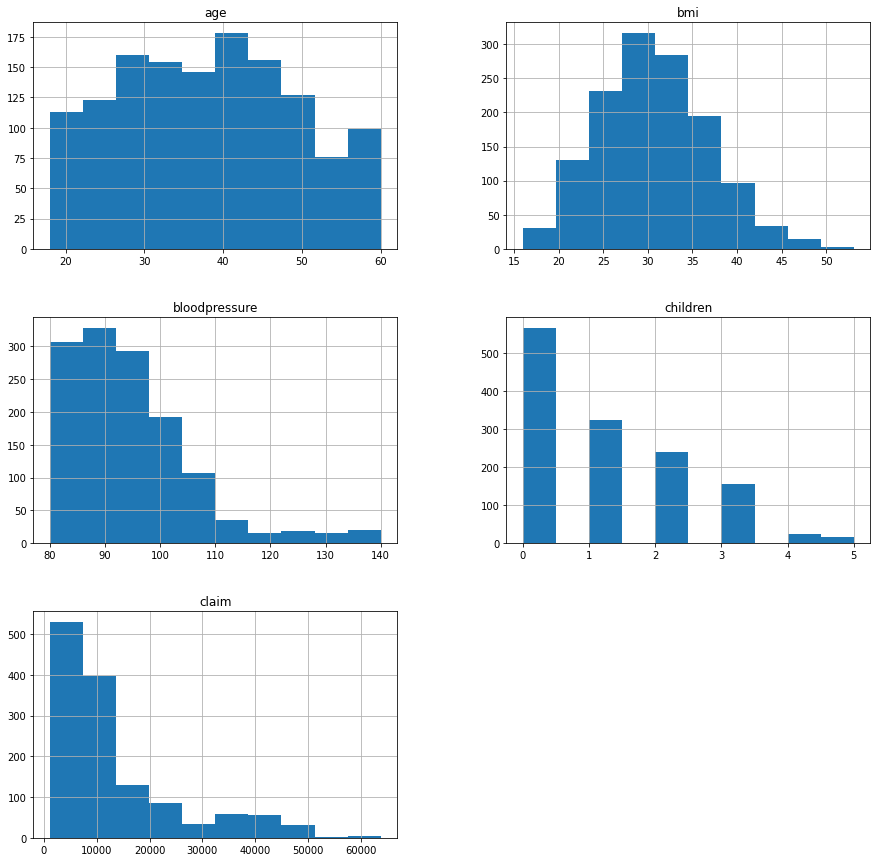

In [20]:
df.hist(figsize=(15,15))

# 

# One Hot Encoding
Categoric features must be change to one hot encoding because model is only could process numeric values.

In [21]:
categoric_columns.columns

Index(['gender', 'diabetic', 'smoker', 'region'], dtype='object')

In [22]:
categoric_feature_list = categoric_columns.columns.tolist()
categoric_feature_list

['gender', 'diabetic', 'smoker', 'region']

In [23]:
#from sklearn.preprocessing import OneHotEncoder

In [24]:
#onehot_encoder = OneHotEncoder(sparse=False)
#onehot_columns = pd.DataFrame(onehot_encoder.fit_transform(df[categoric_feature_list]))
#onehot_columns.index = df.index
#onehot_columns.columns = onehot_encoder.get_feature_names()
#df_final = df.drop(categoric_feature_list, axis=1)
#df_final = pd.concat([df_final, onehot_columns], axis=1)

In [25]:
df_final = pd.get_dummies(df)

In [26]:
df_final.head()

,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,24.0,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
7,19.0,41.1,100,0,1146.80,0,1,1,0,1,0,0,1,0,0
8,20.0,43.0,86,0,1149.40,0,1,1,0,1,0,0,1,0,0
9,30.0,53.1,97,0,1163.46,0,1,1,0,1,0,0,1,0,0


In [27]:
df_final.head()

,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,24.0,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
7,19.0,41.1,100,0,1146.80,0,1,1,0,1,0,0,1,0,0
8,20.0,43.0,86,0,1149.40,0,1,1,0,1,0,0,1,0,0
9,30.0,53.1,97,0,1163.46,0,1,1,0,1,0,0,1,0,0


In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1339
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1332 non-null   float64
 1   bmi               1332 non-null   float64
 2   bloodpressure     1332 non-null   int64  
 3   children          1332 non-null   int64  
 4   claim             1332 non-null   float64
 5   gender_female     1332 non-null   uint8  
 6   gender_male       1332 non-null   uint8  
 7   diabetic_No       1332 non-null   uint8  
 8   diabetic_Yes      1332 non-null   uint8  
 9   smoker_No         1332 non-null   uint8  
 10  smoker_Yes        1332 non-null   uint8  
 11  region_northeast  1332 non-null   uint8  
 12  region_northwest  1332 non-null   uint8  
 13  region_southeast  1332 non-null   uint8  
 14  region_southwest  1332 non-null   uint8  
dtypes: float64(3), int64(2), uint8(10)
memory usage: 107.7 KB


# Splitting Training and Testing for Modelling

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [30]:
X = df_final.drop(['claim'], axis=1)
y = df_final['claim']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [32]:
print("Dataset train contains:", X_train.shape[0], "rows and ", X_train.shape[1], "columns")
print("Dataset test contains:", X_test.shape[0], "rows and ", X_test.shape[1], "columns")

print("Variable target to train contains:", y_train.shape[0], "rows")
print("Variable target to test contains:", y_test.shape[0], "rows")

Dataset train contains: 1065 rows and  14 columns
Dataset test contains: 267 rows and  14 columns
Variable target to train contains: 1065 rows
Variable target to test contains: 267 rows


# Prediction with Various Models
Because target variable is continuous values, so I'll use regression models below:
1. Support Vector Machine (SVM)
2. Random Forest Regressor
3. Linear Regressor

I'll calculate MAE of each model result

**Support Vector Machine (SVM)**

In [33]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_predict = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_predict))

1.0105388209920059


**Random Forest Regression**

In [34]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
y_predict = model_RFR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_predict))

0.6675197402710878


**Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_predict = model_LR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_predict))

0.7063619710643911


# Conclusion
The best model that give better prediction based on the lowest MAE score is **Random Forest Regression**

**Suggestion:** There is no normalize/standarization for numeric features. 

<AxesSubplot:>

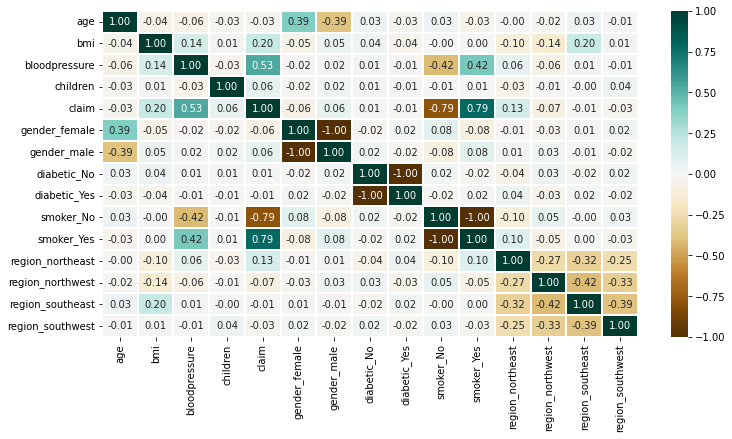

In [36]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_final.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)